<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pck
import sys 
import os
import importlib.util

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/andre/Documents/UFCG/Photonics/Arquivos/Edge-coupler'))
# spec_win.loader.exec_module(lumapi)

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v221/api/python")
sys.path.append(os.path.dirname('C:/Users/PC/Documents/Photonics/Edge-coupler'))
spec_win.loader.exec_module(lumapi)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
opti = lumapi.MODE(filename = 'optimal_coupler.lms')

<font size = 6>Assembly

In [3]:
opti.switchtolayout()
opti.selectall()
opti.delete()

opti.addobject('linear_taper')
opti.set({
    'name'          : 'Coupler',
    'x'             : 0,
    'y'             : 0,
    'z'             : 0,
    'thickness'     : 220e-9,
    'angle_side'    : 90,
    'width_l'       : 450e-9,
    'width_r'       : 150e-9,
    'len'           : 25e-6,
    'material'      : 'Si (Silicon) - Palik'
})

opti.addrect()
opti.set({
    'name'          : 'waveguide',
    'x'             : -13.5e-6,
    'x span'        : 2e-6,
    'y'             : 0,
    'y span'        : 450e-9,
    'z'             : 0,
    'z span'        : 220e-9,
    'material'      : 'Si (Silicon) - Palik'
})

opti.addobject('cc_fiber')
opti.set({
    'first axis'        : 'y',
    'rotation 1'        : 90,
    'x'                 : 15e-6,
    'y'                 : 0,
    'z'                 : 0,
    'index cladding'    : 1.444,
    'index core'        : 1.482,
    'radius core'       : 1.1e-6,
    'radius cladding'   : 62.5e-6,
    'z span'            : 5e-6,
})

opti.addeme()
opti.set({
    'background material'                   : 'SiO2 (Glass) - Palik',
    'x min'                                 : -14.5e-6,
    'y'                                     : 0,
    'y span'                                : 20e-6,
    'z'                                     : 0,
    'z span'                                : 20e-6,
    'number of cell groups'                 : 3,
    'group spans'                           : np.transpose([2e-6, 25e-6, 1e-6]),
    'cells'                                 : np.transpose([1, 20, 1]),
    'subcell method'                        : np.transpose([0, 1, 0]),
    'allow custom eigensolver settings'     : True,
    'modes'                                 : np.transpose([10, 70, 10]),
    'mesh cells y'                          : 200,
    'mesh cells z'                          : 200,
    'y min bc'                              : 'Anti-Symmetric',
    'y max bc'                              : 'PML',
    'Z min bc'                              : 'Metal',
    'Z max bc'                              : 'Metal',
})

opti.addemeindex()
opti.set({
    'name'                      : 'index',
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
})

opti.addemeprofile()
opti.set({
    'name'                      : 'profile',
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
})

opti.addmesh()
opti.set({
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 500e-9,
    'z'                         : 0,
    'z span'                    : 250e-9,
    'set mesh multiplier'       : True,
    'override x mesh'           : False,
    'y mesh multiplier'         : 5,
    'z mesh multiplier'         : 5,        
})

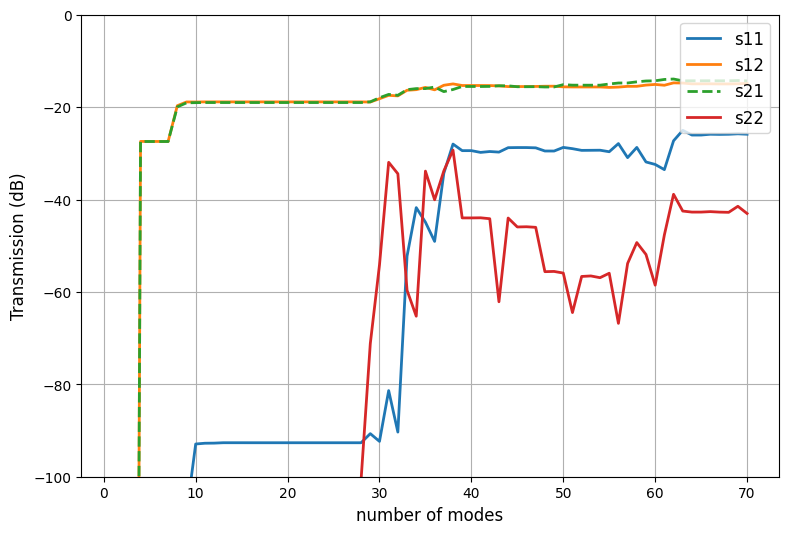

In [43]:
#mode sweep
opti.run()
opti.emepropagate()

opti.setemeanalysis('mode convergence sweep', True)
opti.setemeanalysis('start mode', 1)
opti.setemeanalysis('mode interval', 1)
opti.emesweep('mode convergence sweep')

S = opti.getemesweep('S_mode_convergence_sweep')
x_axis = S['modes']
s11 = 10*np.log10(np.abs(S['s11'])**2)
s12 = 10*np.log10(np.abs(S['s12'])**2)
s21 = 10*np.log10(np.abs(S['s21'])**2)
s22 = 10*np.log10(np.abs(S['s22'])**2)

plt.figure(figsize = (9,6))
plt.plot(x_axis, s11, label = 's11', linewidth = 2)
plt.plot(x_axis, s12, label = 's12', linewidth = 2)
plt.plot(x_axis, s21, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis, s22, label = 's22', linewidth = 2)
plt.xlabel('number of modes', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.ylim(-100, 0)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

opti.setemeanalysis('mode convergence sweep', False)

<font size = 6>Taper width sweep

In [29]:
np.arange(50e-9, 250e-9, 50e-9)

array([5.0e-08, 1.0e-07, 1.5e-07, 2.0e-07])

In [4]:
points = 101
w = np.arange(50e-9, 250e-9, 50e-9)
s11 = np.zeros((len(w), points))
s12 = np.zeros((len(w), points))
s21 = np.zeros((len(w), points))
s22 = np.zeros((len(w), points))

for i, width in enumerate(w):
    opti.switchtolayout()
    opti.setnamed('Coupler', {
        'width_r'       : width,
    })
    opti.run()
    opti.emepropagate()
    opti.setemeanalysis('wavelength sweep', True)
    opti.setemeanalysis('start wavelength', 1500e-9)
    opti.setemeanalysis('stop wavelength', 1600e-9)
    opti.setemeanalysis('number of wavelength points', points)
    opti.emesweep('wavelength sweep')

    S = opti.getemesweep('S_wavelength_sweep')
    x_axis = S['wavelength']
    s11[i,:] = 10*np.log10(np.abs(S['s11'])**2)
    s12[i,:] = 10*np.log10(np.abs(S['s12'])**2)
    s21[i,:] = 10*np.log10(np.abs(S['s21'])**2)
    s22[i,:] = 10*np.log10(np.abs(S['s22'])**2)

    opti.setemeanalysis('wavelength sweep', False)

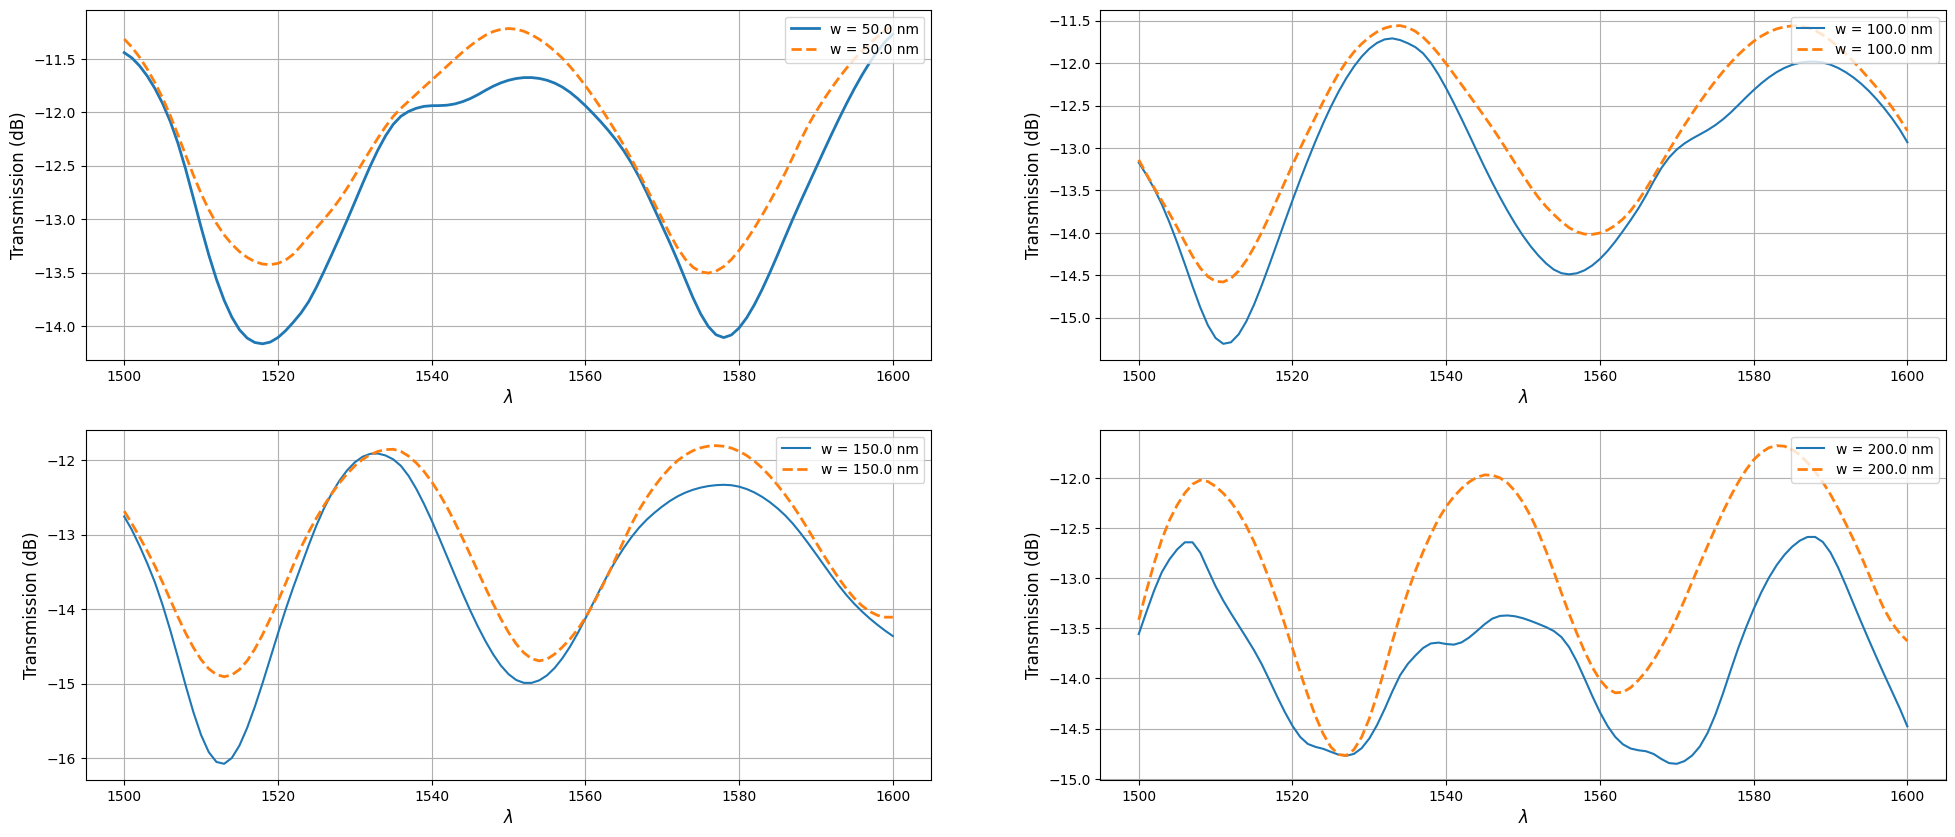

In [5]:
fig, ax = plt.subplots(2, 2, figsize = ((24,10)))
ax[0,0].plot(x_axis*1e9, s12[0,:], label = 'w = {} nm'.format(w[0]*1e9), linewidth = 2)
ax[0,0].plot(x_axis*1e9, s21[0,:], label = 'w = {} nm'.format(w[0]*1e9), linewidth = 2, ls = '--')
ax[0,0].set_xlabel(r'$\lambda$', fontsize = 12)
ax[0,0].set_ylabel('Transmission (dB)', fontsize = 12)
ax[0,0].legend(loc = 'upper right')
ax[0,0].grid(True)

ax[0,1].plot(x_axis*1e9, s12[1,:], label = 'w = {} nm'.format(w[1]*1e9))
ax[0,1].plot(x_axis*1e9, s21[1,:], label = 'w = {} nm'.format(w[1]*1e9), linewidth = 2, ls = '--')
ax[0,1].set_xlabel(r'$\lambda$', fontsize = 12)
ax[0,1].set_ylabel('Transmission (dB)', fontsize = 12)
ax[0,1].legend(loc = 'upper right')
ax[0,1].grid(True)

ax[1,0].plot(x_axis*1e9, s12[2,:], label = 'w = {} nm'.format(w[2]*1e9))
ax[1,0].plot(x_axis*1e9, s21[2,:], label = 'w = {} nm'.format(w[2]*1e9), linewidth = 2, ls = '--')
ax[1,0].set_xlabel(r'$\lambda$', fontsize = 12)
ax[1,0].set_ylabel('Transmission (dB)', fontsize = 12)
ax[1,0].legend(loc = 'upper right')
ax[1,0].grid(True)

ax[1,1].plot(x_axis*1e9, s12[3,:], label = 'w = {} nm'.format(w[3]*1e9))
ax[1,1].plot(x_axis*1e9, s21[3,:], label = 'w = {} nm'.format(w[3]*1e9), linewidth = 2, ls = '--')
ax[1,1].set_xlabel(r'$\lambda$', fontsize = 12)
ax[1,1].set_ylabel('Transmission (dB)', fontsize = 12)
ax[1,1].legend(loc = 'upper right')
ax[1,1].grid(True)

<font size = 6>Taper position sweep

In [6]:
opti.switchtolayout()
opti.setnamed('Coupler', {
    'x'                                     : -2e-6,
})
opti.setnamed('waveguide', {
    'x'                                     : -15.5e-6,
})
opti.setnamed('mesh', {
    'x min'                                 : -16.5e-6,
})
opti.setnamed('EME', {
    'x min'                                 : -16.5e-6,
    'number of cell groups'                 : 4,
    'group spans'                           : np.transpose([2e-6, 25e-6, 2e-6, 1e-6]),
    'allow custom eigensolver settings'     : True,
    'cells'                                 : np.transpose([1, 20, 10, 1]),
    #'modes'                                 : np.transpose([10, 20, 70, 10]),
})


In [16]:
opti.run()
opti.emepropagate()

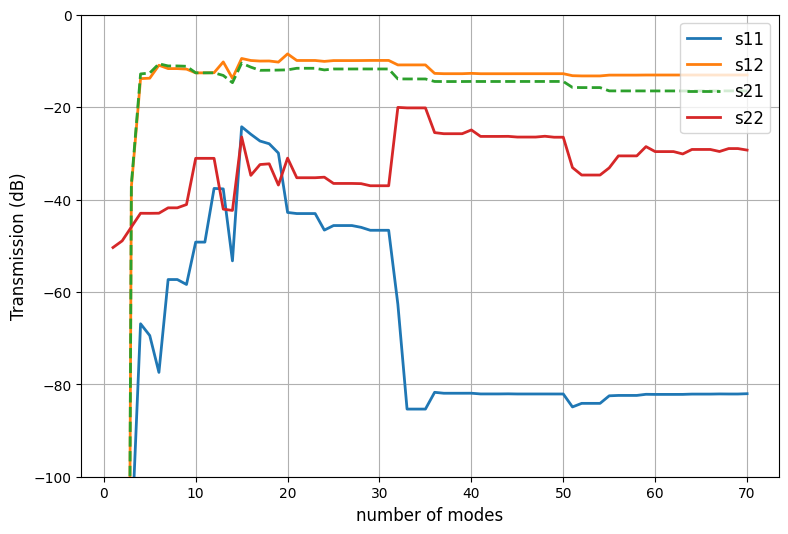

In [17]:
opti.setemeanalysis('mode convergence sweep', True)
opti.setemeanalysis('start mode', 1)
opti.setemeanalysis('mode interval', 1)
opti.emesweep('mode convergence sweep')

S = opti.getemesweep('S_mode_convergence_sweep')
x_axis = S['modes']
s11 = 10*np.log10(np.abs(S['s11'])**2)
s12 = 10*np.log10(np.abs(S['s12'])**2)
s21 = 10*np.log10(np.abs(S['s21'])**2)
s22 = 10*np.log10(np.abs(S['s22'])**2)

plt.figure(figsize = (9,6))
plt.plot(x_axis, s11, label = 's11', linewidth = 2)
plt.plot(x_axis, s12, label = 's12', linewidth = 2)
plt.plot(x_axis, s21, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis, s22, label = 's22', linewidth = 2)
plt.xlabel('number of modes', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.ylim(-100, 0)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

opti.setemeanalysis('mode convergence sweep', False)

In [21]:
opti.switchtolayout()
opti.setnamed('EME', {
    'modes'                                 : np.transpose([10, 20, 55, 10]),
})

opti.run()
opti.emepropagate()

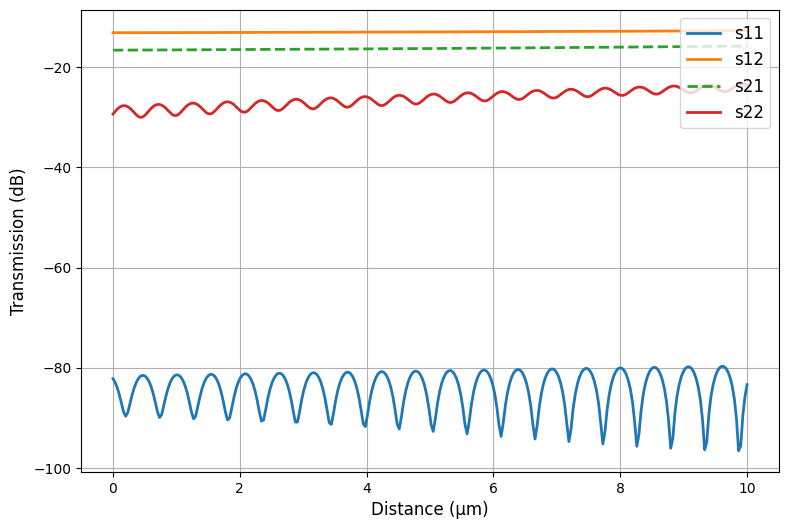

In [22]:
opti.setemeanalysis('propagation sweep', True)
opti.setemeanalysis('parameter', 'group span 3')
opti.setemeanalysis('start', 0)
opti.setemeanalysis('stop', 10e-6)
opti.setemeanalysis('number of points', 300)
opti.emesweep()

S = opti.getemesweep('S')
x_axis = S['group_span_3']
s11_pos_sweep = 10*np.log10(np.abs(S['s11']**2))
s12_pos_sweep = 10*np.log10(np.abs(S['s12']**2))
s21_pos_sweep = 10*np.log10(np.abs(S['s21']**2))
s22_pos_sweep = 10*np.log10(np.abs(S['s22']**2))

plt.figure(figsize = (9,6))
plt.plot(x_axis*1e6, s11_pos_sweep, label = 's11', linewidth = 2)
plt.plot(x_axis*1e6, s12_pos_sweep, label = 's12', linewidth = 2)
plt.plot(x_axis*1e6, s21_pos_sweep, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis*1e6, s22_pos_sweep, label = 's22', linewidth = 2)
plt.xlabel('Distance (μm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

opti.setemeanalysis('propagation sweep', False)

In [23]:
points = 101
taper_x = np.arange(0, -5.5e-6, -500e-9)
s11 = np.zeros((len(taper_x), points))
s12 = np.zeros((len(taper_x), points))
s21 = np.zeros((len(taper_x), points))
s22 = np.zeros((len(taper_x), points))

for i, x in enumerate(taper_x):

    group_span_1 = [2e-6]
    group_span_2 = [25e-6 - x]
    group_span_3 = [1e-6]
    group_spans = np.concatenate([group_span_1, group_span_2, group_span_3])

    opti.switchtolayout()
    opti.setnamed('Coupler', {
        'x'                         : x,
    })
    opti.setnamed('waveguide', {
        'x'                         : -13.5e-6 + x,
    })
    opti.setnamed('mesh', {
        'x min'                     : -14.5e-6 + x,
    })
    opti.select('EME')
    opti.set({
        'x min'                     : -14.5e-6 + x,
        'group spans'                : np.transpose([2e-6, 25.5e-6, 1e-6]),
    })
    print(group_spans)
    # opti.run()
    # opti.emepropagate()
    # opti.setemeanalysis('wavelength sweep', True)
    # opti.setemeanalysis('start wavelength', 1500e-9)
    # opti.setemeanalysis('stop wavelength', 1600e-9)
    # opti.setemeanalysis('number of wavelength points', points)
    # opti.emesweep('wavelength sweep')

    # S = opti.getemesweep('S_wavelength_sweep')
    # x_axis = S['wavelength']
    # s11[i,:] = 10*np.log10(np.abs(S['s11']))
    # s12[i,:] = 10*np.log10(np.abs(S['s12']))
    # s21[i,:] = 10*np.log10(np.abs(S['s21']))
    # s22[i,:] = 10*np.log10(np.abs(S['s22']))

    # opti.setemeanalysis('wavelength sweep', False)

LumApiError: 'error during property setting, the requested properties were not set'